# WeatherPy

In this deliverable, you'll create a Python script to visualize the weather of over 500 cities of varying distances from the equator. You'll use the citipy Python libraryLinks to an external site., the OpenWeatherMap APILinks to an external site., and your problem-solving skills to create a representative model of weather across cities.

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations

# This line generates an array lats of 1500 random latitude values within the specified range using NumPy's random.uniform() function.
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
# This line creates a zip object lat_lngs by pairing each latitude and longitude value together.
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    # This line uses the citipy library to find the nearest city to the current latitude and longitude pair and retrieves the city name.
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 596
['wailua homesteads', 'sarnen', 'vorgashor', 'klyuchi', 'horta', 'adamstown', 'lebu', 'edinburgh of the seven seas', 'grytviken', 'georgetown', 'hadibu', 'queenstown', 'port-aux-francais', 'puerto ayora', "st. john's", 'margaret river', 'liwale', 'waitangi', 'holualoa', 'petropavlovsk-kamchatsky', 'ushuaia', 'avarua', 'udachny', 'egilsstadir', 'isafjordur', 'zaysan', 'salalah', 'guerrero negro', 'libourne', 'porkhov', 'utrik', 'zhob', 'bethel', 'bilibino', 'sakaiminato', 'kievka', 'puerto aysen', 'weyburn', 'nadym', 'puerto natales', 'west island', 'at-bashi', 'arraial do cabo', 'ancud', 'kirkwall', 'hamilton', 'catacaos', 'gao', 'olonkinbyen', 'magadi', 'thayetmyo', 'longyearbyen', "hongch'on", 'ribeira grande', 'tommot', 'hawaiian paradise park', 'olinda', 'gebeit', 'vilyuysk', "mil'kovo", 'hithadhoo', 'chibougamau', 'fuyuan', 'qamdo', 'nemuro', 'taulaga', 'san julian', 'saint-paul', 'coxen hole', 'gadzhiyevo', 'great falls', 'college', 'belyayevka',

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city (Step 1)
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # city_weather = requests.get(city_url).json
        
        # Step 2:
        response = requests.get(city_url)
        
        # Step 3: 
        status_code = response.status_code
        
        # Step 4: 
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {} # failed request
            
        # Step 5: Extraction
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")
        city_pressure = city_weather.get("main", {}).get("pressure")
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)

    # Sleep
    # time.sleep(1)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wailua homesteads
Processing Record 2 of Set 1 | sarnen
Processing Record 3 of Set 1 | vorgashor
Processing Record 4 of Set 1 | klyuchi
Processing Record 5 of Set 1 | horta
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | hadibu
Processing Record 12 of Set 1 | queenstown
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | st. john's
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | liwale
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | holualoa
Processing Record 20 of Set 1 | petropavlovsk-kamchatsky
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 |

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,82.83,80.0,20.0,11.50,US,1.719434e+09
1,sarnen,46.8985,8.2507,66.54,89.0,40.0,4.61,CH,1.719434e+09
2,vorgashor,67.5833,63.9500,50.25,96.0,100.0,8.23,RU,1.719434e+09
3,klyuchi,52.2667,79.1667,70.18,80.0,0.0,7.09,RU,1.719434e+09
4,horta,38.5333,-28.6333,72.01,78.0,75.0,10.36,PT,1.719434e+09


In [12]:
city_data_df.loc[pd.isnull(city_data_df.Lat)]

# Code Breakdown:
    # pd.isnull(city_data_df.Lat): This part of the code checks for missing values in the "Lat" column of the DataFrame. pd.isnull() is a pandas function that returns a boolean mask where True indicates missing values (NaN) and False indicates non-missing values.
    # city_data_df.loc[...]: This part of the code uses the loc function to access rows in the DataFrame based on the boolean mask generated by pd.isnull(city_data_df.Lat). It filters the DataFrame to select only the rows where the "Lat" column has missing values.

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
74,vingt cinq,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
80,oualidia,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
85,taiohae,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
94,benito garcia (el zorrillo),NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
113,puerto san carlos,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
135,unye,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
141,fuvahmulah,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
164,sofifi,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
175,maevatanana,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
178,baluntaicun,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [14]:
city_data_df2 = city_data_df.dropna(how='any').reset_index()
city_data_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       565 non-null    int64  
 1   City        565 non-null    object 
 2   Lat         565 non-null    float64
 3   Lng         565 non-null    float64
 4   Max Temp    565 non-null    float64
 5   Humidity    565 non-null    float64
 6   Cloudiness  565 non-null    float64
 7   Wind Speed  565 non-null    float64
 8   Country     565 non-null    object 
 9   Date        565 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 44.3+ KB


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df2 = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,82.83,80.0,20.0,11.50,US,1.719434e+09
1,sarnen,46.8985,8.2507,66.54,89.0,40.0,4.61,CH,1.719434e+09
2,vorgashor,67.5833,63.9500,50.25,96.0,100.0,8.23,RU,1.719434e+09
3,klyuchi,52.2667,79.1667,70.18,80.0,0.0,7.09,RU,1.719434e+09
4,horta,38.5333,-28.6333,72.01,78.0,75.0,10.36,PT,1.719434e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

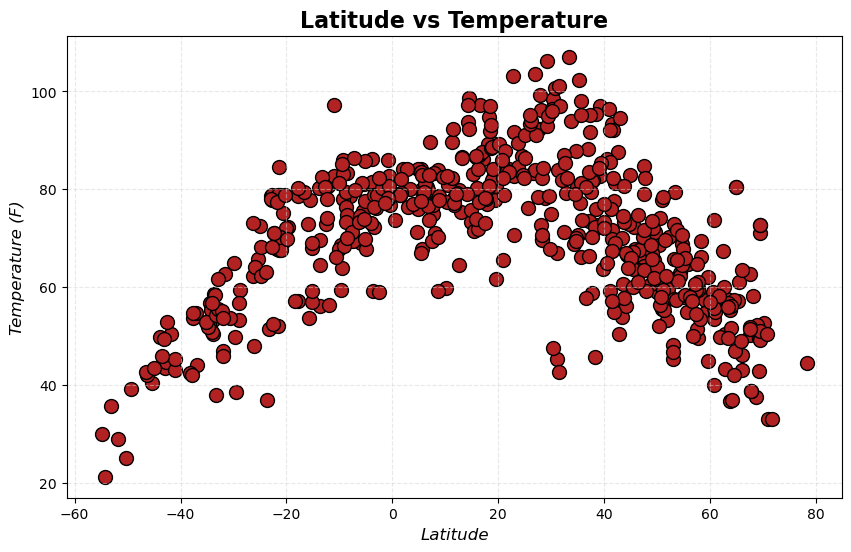

In [17]:
# scatter latitude vs temperature

# Step 1: Get the Data
x = city_data_df2.Lat
y = city_data_df2['Max Temp']

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Temperature (F)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
      
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

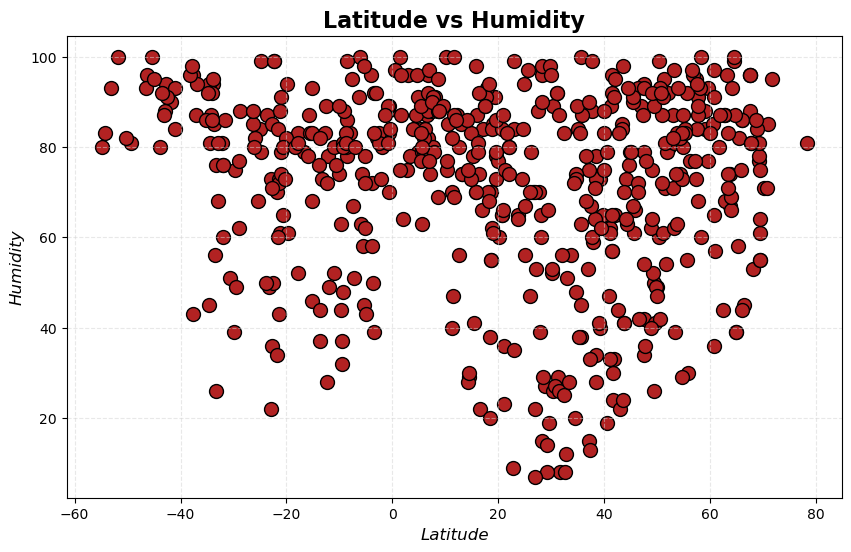

In [18]:
# scatter latitude vs temperature

# Step 1: Get the Data
x = city_data_df2.Lat
y = city_data_df2.Humidity

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
      
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

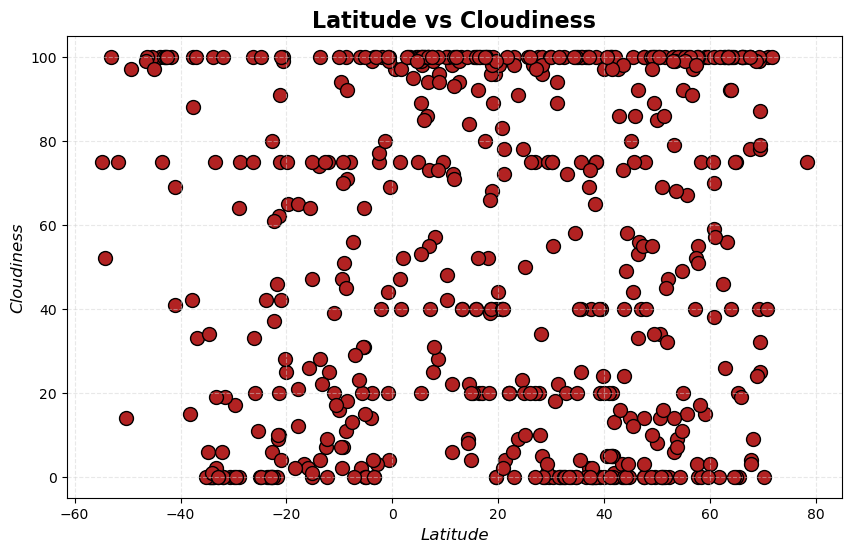

In [19]:
# scatter latitude vs temperature

# Step 1: Get the Data
x = city_data_df2.Lat
y = city_data_df2.Cloudiness

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
      
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

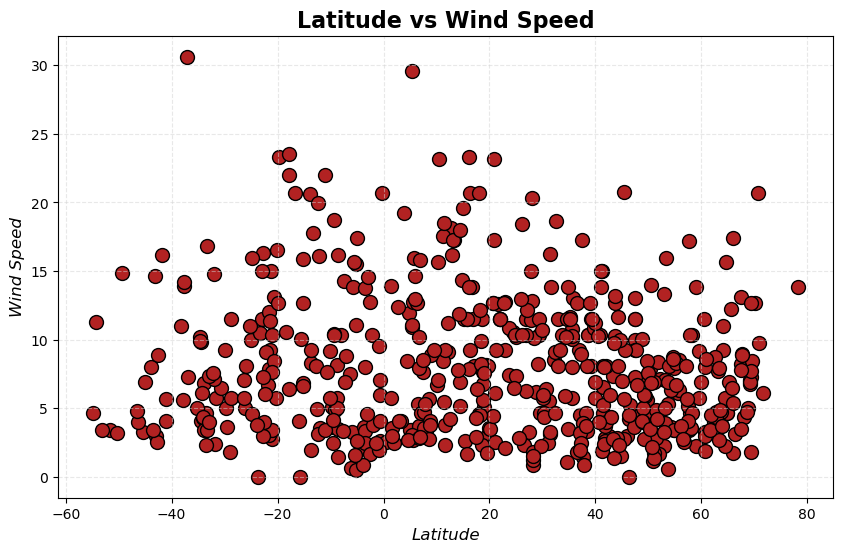

In [20]:
# scatter latitude vs temperature

# Step 1: Get the Data
x = city_data_df2.Lat
y = city_data_df2['Wind Speed']

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
      
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_title, y_title, text_coordinates):
    # USING LINREGRESS
   
    
    # makes the line of best fit
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # calculate the predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # make the plot
    # Step 2: Make the canvas
    plt.figure(figsize=(10, 6))
    
    # Step 3: Make the basic plot
    plt.scatter(x_values, y_values, facecolor="firebrick", edgecolor="black", s=100)
    plt.plot(x_values, regress_values, "r-") # plot the line of best fit
    
    # Step 4: Customizations
    plt.xlabel(x_title, fontsize=12, fontstyle="italic")
    plt.ylabel(y_title, fontsize=12, fontstyle="italic")
    plt.title(f"{x_title} vs {y_title}", fontweight="bold", fontsize=16)
    plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df2.loc[(city_data_df2['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,82.83,80.0,20.0,11.50,US,1.719434e+09
1,sarnen,46.8985,8.2507,66.54,89.0,40.0,4.61,CH,1.719434e+09
2,vorgashor,67.5833,63.9500,50.25,96.0,100.0,8.23,RU,1.719434e+09
3,klyuchi,52.2667,79.1667,70.18,80.0,0.0,7.09,RU,1.719434e+09
4,horta,38.5333,-28.6333,72.01,78.0,75.0,10.36,PT,1.719434e+09


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df2.loc[(city_data_df2['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,adamstown,-25.0660,-130.1015,72.45,84.0,0.0,9.98,PN,1.719434e+09
6,lebu,-37.6167,-73.6500,53.62,96.0,100.0,13.89,CL,1.719434e+09
7,edinburgh of the seven seas,-37.0676,-12.3116,54.61,87.0,100.0,30.62,SH,1.719434e+09
8,grytviken,-54.2811,-36.5092,21.20,83.0,52.0,11.27,GS,1.719434e+09
11,queenstown,-31.8976,26.8753,46.90,76.0,0.0,2.35,ZA,1.719434e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.4184373296204038


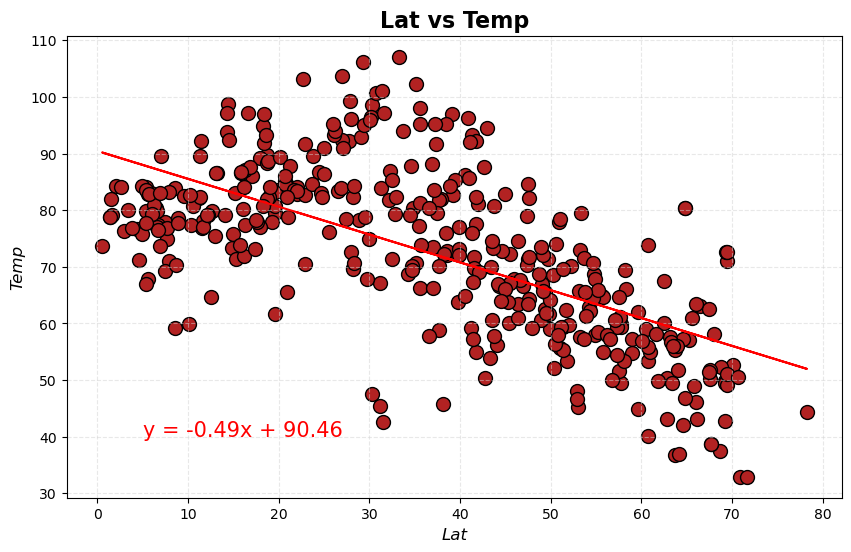

In [24]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Lat', 'Temp', (5,40))

The r-squared is: 0.6760713091100743


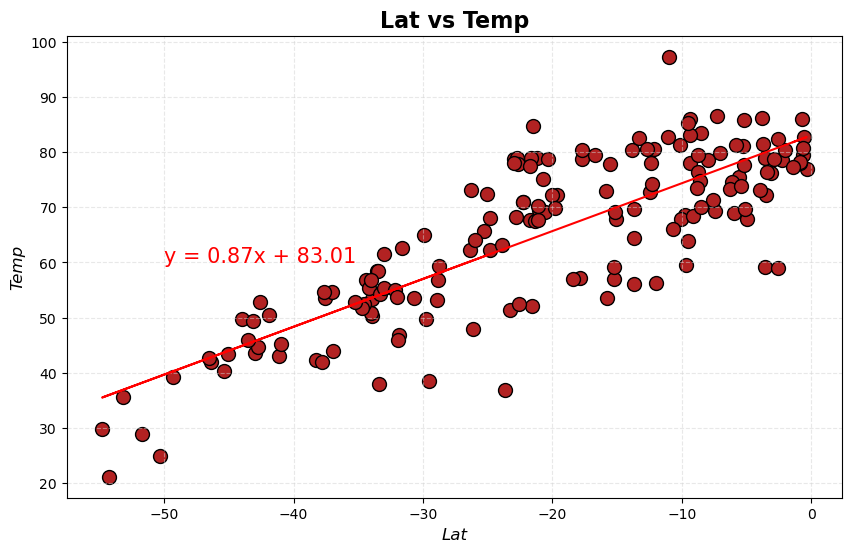

In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Lat', 'Temp', (-50,60))

**Discussion about the linear relationship:** There is a moderate negative relationship between latitude and temperature in northern hemisphere and a strong positive relationship between temperature and latitude in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Humidity
plot_linear_regression(x_values, y_values, 'Lat', 'Humidity', (50,20))

In [ ]:
# Southern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Humidity
plot_linear_regression(x_values, y_values, 'Lat', 'Humidity', (50,20))

**Discussion about the linear relationship:** There is a weak relationship between latitude and humidity in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Cloudiness
plot_linear_regression(x_values, y_values, 'Lat', 'Cloudiness', (20,60))

In [ ]:
# Southern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Cloudiness
plot_linear_regression(x_values, y_values, 'Lat', 'Cloudiness', (20,60))

**Discussion about the linear relationship:** There is a weak relationship between Cloudiness and Latitude in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Lat', 'Wind Speed', (20,25))

In [ ]:
# Southern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Lat', 'Wind Speed', (20,25))

**Discussion about the linear relationship:** There is a nearly 0 (weak) relationship between wind speed and latitude in both hemispheres.